In [ ]:
# Instalando Bibliotecas

%pip install sidrapy
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib

In [3]:
import sidrapy

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '2265',
                             period = 'all',
                             header = 'n')

In [6]:
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
515,1,Brasil,2,%,5.90,1,Brasil,202211,novembro 2022,2265,IPCA - Variação acumulada em 12 meses
516,1,Brasil,2,%,5.79,1,Brasil,202212,dezembro 2022,2265,IPCA - Variação acumulada em 12 meses
517,1,Brasil,2,%,5.77,1,Brasil,202301,janeiro 2023,2265,IPCA - Variação acumulada em 12 meses
518,1,Brasil,2,%,5.60,1,Brasil,202302,fevereiro 2023,2265,IPCA - Variação acumulada em 12 meses


In [10]:
# Limpando a tabele ipca_raw
ipca = (
    ipca_raw
    .loc[0:,['V','D2C']]
    .rename(columns={'V':'ipca',
                     'D2C' :'date'})
)

In [11]:
ipca

,ipca,date
0,...,197912
1,...,198001
2,...,198002
3,...,198003
4,...,198004
...,...,...
515,5.90,202211
516,5.79,202212
517,5.77,202301
518,5.60,202302


In [14]:
# Eliminando observacoes com ...

ipca = ipca.loc[ipca.date >= '2004-01-01']

In [ ]:
ipca['date'] = pd.to_datetime(ipca['date'],
                              format = '%Y%m')


In [17]:
ipca

,ipca,date
289,7.71,2004-01-01
290,6.69,2004-02-01
291,5.89,2004-03-01
292,5.26,2004-04-01
293,5.15,2004-05-01
...,...,...
515,5.90,2022-11-01
516,5.79,2022-12-01
517,5.77,2023-01-01
518,5.60,2023-02-01


In [ ]:
#Alterando o tipo de dados: ipca = float and date = data

ipca['ipca'] = ipca['ipca'].astype(float)


In [19]:
ipca

,ipca,date
289,7.71,2004-01-01
290,6.69,2004-02-01
291,5.89,2004-03-01
292,5.26,2004-04-01
293,5.15,2004-05-01
...,...,...
515,5.90,2022-11-01
516,5.79,2022-12-01
517,5.77,2023-01-01
518,5.60,2023-02-01


In [20]:
ipca.describe()

,ipca,date
count,231.000000,231
mean,5.834502,2013-08-01 00:12:28.051948032
min,1.880000,2004-01-01 00:00:00
25%,4.310000,2008-10-16 12:00:00
50%,5.700000,2013-08-01 00:00:00
75%,6.730000,2018-05-16 12:00:00
max,12.130000,2023-03-01 00:00:00
std,2.164245,NaN


<Axes: xlabel='date', ylabel='ipca'>

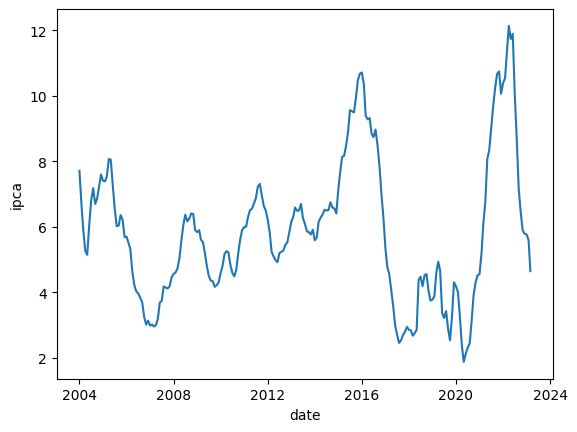

In [21]:
sns.lineplot(x= 'date',
             y='ipca',
             data = ipca)

<Axes: xlabel='ipca', ylabel='Count'>

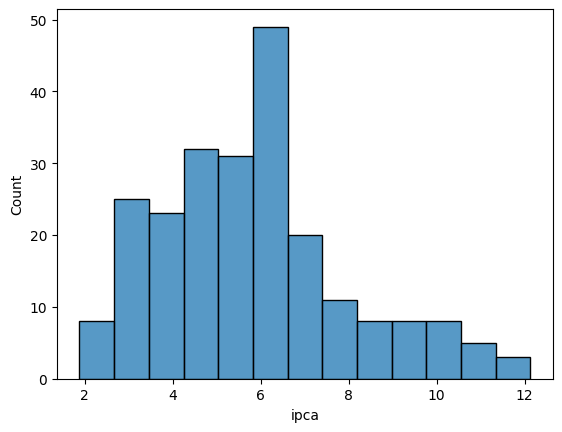

In [22]:
sns.histplot(x='ipca',
             data = ipca)


<Axes: ylabel='ipca'>

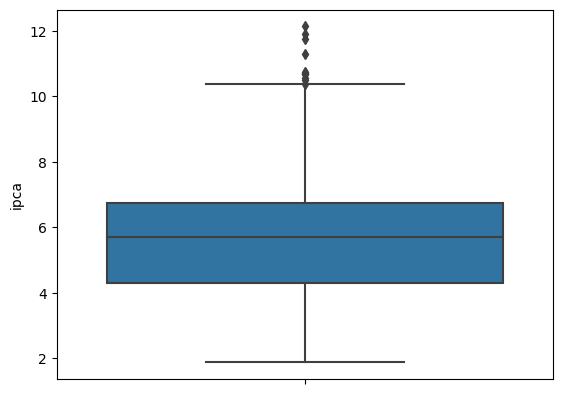

In [23]:
sns.boxplot(y='ipca',
            data = ipca)


In [24]:
# Taxa de desocupação - % - PNADC-M/IBGE
desocupacao_raw = sidrapy.get_table(table_code= "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header ='n')

In [27]:
desocupacao_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,2,%,8.0,1,Brasil,201203,jan-fev-mar 2012,4099,"Taxa de desocupação, na semana de referência, ..."
1,1,Brasil,2,%,7.8,1,Brasil,201204,fev-mar-abr 2012,4099,"Taxa de desocupação, na semana de referência, ..."
2,1,Brasil,2,%,7.7,1,Brasil,201205,mar-abr-mai 2012,4099,"Taxa de desocupação, na semana de referência, ..."
3,1,Brasil,2,%,7.6,1,Brasil,201206,abr-mai-jun 2012,4099,"Taxa de desocupação, na semana de referência, ..."
4,1,Brasil,2,%,7.5,1,Brasil,201207,mai-jun-jul 2012,4099,"Taxa de desocupação, na semana de referência, ..."
...,...,...,...,...,...,...,...,...,...,...,...
128,1,Brasil,2,%,8.1,1,Brasil,202211,set-out-nov 2022,4099,"Taxa de desocupação, na semana de referência, ..."
129,1,Brasil,2,%,7.9,1,Brasil,202212,out-nov-dez 2022,4099,"Taxa de desocupação, na semana de referência, ..."
130,1,Brasil,2,%,8.4,1,Brasil,202301,nov-dez-jan 2023,4099,"Taxa de desocupação, na semana de referência, ..."
131,1,Brasil,2,%,8.6,1,Brasil,202302,dez-jan-fev 2023,4099,"Taxa de desocupação, na semana de referência, ..."


In [25]:
# Realiza a limpeza e manipulação da tabela
desocupacao =  (
     desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'desocupacao',
                       'D2C': 'date',}
            )
      )


In [26]:
desocupacao

,desocupacao,date
0,8.0,201203
1,7.8,201204
2,7.7,201205
3,7.6,201206
4,7.5,201207
...,...,...
128,8.1,202211
129,7.9,202212
130,8.4,202301
131,8.6,202302


In [28]:
# Transforma a coluna date em tipo datetime
desocupacao['date'] = pd.to_datetime(desocupacao['date'],
                                format = "%Y%m")


In [29]:
desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
128,8.1,2022-11-01
129,7.9,2022-12-01
130,8.4,2023-01-01
131,8.6,2023-02-01


In [30]:
# Transforma a coluna ipca em tipo float
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)


In [31]:
desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
128,8.1,2022-11-01
129,7.9,2022-12-01
130,8.4,2023-01-01
131,8.6,2023-02-01


In [34]:
# Filtra os dados
desocupacao = desocupacao.loc[desocupacao.date > '2004-01-01']


In [35]:
desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
128,8.1,2022-11-01
129,7.9,2022-12-01
130,8.4,2023-01-01
131,8.6,2023-02-01


In [36]:
# Junta os dados
df_dados = pd.merge(ipca, desocupacao, on = 'date')

In [37]:
df_dados

,ipca,date,desocupacao
0,5.24,2012-03-01,8.0
1,5.10,2012-04-01,7.8
2,4.99,2012-05-01,7.7
3,4.92,2012-06-01,7.6
4,5.20,2012-07-01,7.5
...,...,...,...
128,5.90,2022-11-01,8.1
129,5.79,2022-12-01,7.9
130,5.77,2023-01-01,8.4
131,5.60,2023-02-01,8.6


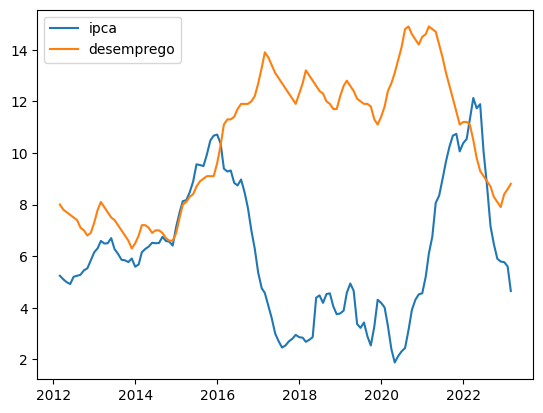

In [40]:
plt.plot('date',
         'ipca',
         data = df_dados,
         label = 'ipca')

plt.plot('date',
         'desocupacao',
         data = df_dados,
         label = 'desemprego')

plt.legend()
plt.show()


In [ ]:
#Instalando Biblioteca

%pip install statsmodels

In [42]:
#  Importando Biblioteca

import statsmodels.formula.api as smf

In [47]:
# Modelo

modelo = smf.ols('ipca ~ desocupacao',
                 data = df_dados).fit()

In [48]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     12.84
Date:                Fri, 05 May 2023   Prob (F-statistic):           0.000478
Time:                        13:22:11   Log-Likelihood:                -308.70
No. Observations:                 133   AIC:                             621.4
Df Residuals:                     131   BIC:                             627.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.2265      0.895     10.305      0.000       7.455      10.998
desocupacao    -0.2972      0.083     -3.583      0.000      -0.461      -0.133
==============================================================================
Omnibus:                       15.819   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.411
Skew:                           0.808   Prob(JB):                     0.000273
Kurtosis:                       2.410   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='desocupacao', ylabel='ipca'>

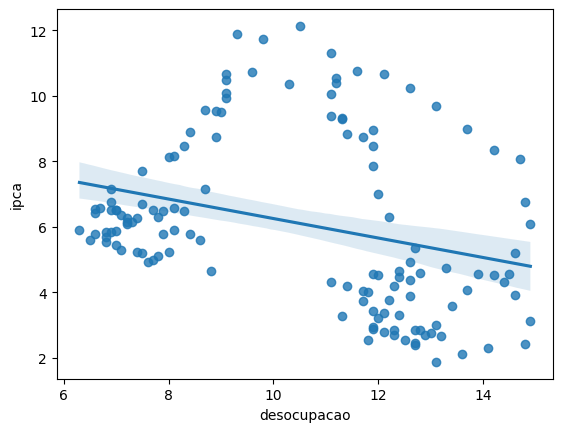

In [49]:
sns.regplot(x = 'desocupacao',
            y='ipca',
            data = df_dados)